In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')
data

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [7]:
# Filter data until the end of 2020
data_until_2020 = data[data['JAHR'] <= 2020].copy()

# Remove null values and 'Summe' from 'MONAT' column
data_until_2020 = data_until_2020.dropna()

# Convert 'MONAT' column to integers
data_until_2020['MONAT'] = data_until_2020['MONAT'].astype(str).str[-2:].astype(int)
data_until_2020

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
36,Alkoholunfälle,insgesamt,2020,1,28.0,22.0,-20.00,27.27,37.0
37,Alkoholunfälle,insgesamt,2020,2,40.0,28.0,42.86,42.86,38.0
38,Alkoholunfälle,insgesamt,2020,3,27.0,34.0,-32.50,-20.59,37.0
39,Alkoholunfälle,insgesamt,2020,4,26.0,36.0,-3.70,-27.78,36.0
40,Alkoholunfälle,insgesamt,2020,5,40.0,39.0,53.85,2.56,36.0
...,...,...,...,...,...,...,...,...,...
1999,Verkehrsunfälle,Verletzte und Getötete,2001,8,600.0,647.0,-34.85,-7.26,617.0
2000,Verkehrsunfälle,Verletzte und Getötete,2001,9,643.0,675.0,7.17,-4.74,614.0
2001,Verkehrsunfälle,Verletzte und Getötete,2001,10,717.0,615.0,11.51,16.59,623.0
2002,Verkehrsunfälle,Verletzte und Getötete,2001,11,568.0,578.0,-20.78,-1.73,622.0


## **visualise historically the number of accidents per category**

MONATSZAHL
Verkehrsunfälle    720
Fluchtunfälle      480
Alkoholunfälle     478
Name: count, dtype: int64


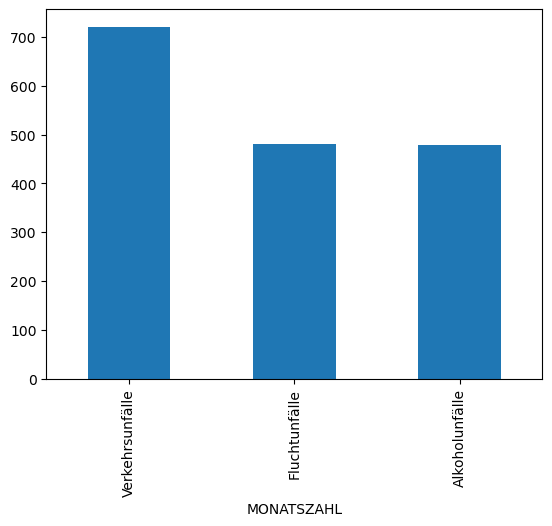

In [8]:
print(data_until_2020['MONATSZAHL'].value_counts())
data_until_2020['MONATSZAHL'].value_counts().plot(kind='bar')
plt.savefig('Accidents_per_category_visualization.png') 

## **forecasts the values for: Category: 'Alkoholunfälle',Type: 'insgesamt,Year: '2021'Month: '01**

In [9]:
# Filter specific category and type (Alkoholunfälle insgesamt)
category_data = data_until_2020[
    (data_until_2020['MONATSZAHL'] == 'Alkoholunfälle') &
    (data_until_2020['AUSPRAEGUNG'] == 'insgesamt')
]
category_data

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
36,Alkoholunfälle,insgesamt,2020,1,28.0,22.0,-20.00,27.27,37.0
37,Alkoholunfälle,insgesamt,2020,2,40.0,28.0,42.86,42.86,38.0
38,Alkoholunfälle,insgesamt,2020,3,27.0,34.0,-32.50,-20.59,37.0
39,Alkoholunfälle,insgesamt,2020,4,26.0,36.0,-3.70,-27.78,36.0
40,Alkoholunfälle,insgesamt,2020,5,40.0,39.0,53.85,2.56,36.0
...,...,...,...,...,...,...,...,...,...
271,Alkoholunfälle,insgesamt,2001,8,60.0,77.0,-15.49,-22.08,71.0
272,Alkoholunfälle,insgesamt,2001,9,107.0,84.0,78.33,27.38,73.0
273,Alkoholunfälle,insgesamt,2001,10,77.0,83.0,-28.04,-7.23,73.0
274,Alkoholunfälle,insgesamt,2001,11,68.0,71.0,-11.69,-4.23,72.0


## **Create prophet model**

In [10]:
# Prepare data for Prophet
prophet_data = category_data[['JAHR', 'MONAT', 'WERT']]
prophet_data.columns = ['ds', 'month', 'y']
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + prophet_data['month'].astype(str).str.zfill(2), format='%Y%m')
prophet_data

C:\Users\Hp\AppData\Local\Temp\ipykernel_21984\3931478061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + prophet_data['month'].astype(str).str.zfill(2), format='%Y%m')


,ds,month,y
36,2020-01-01,1,28.0
37,2020-02-01,2,40.0
38,2020-03-01,3,27.0
39,2020-04-01,4,26.0
40,2020-05-01,5,40.0
...,...,...,...
271,2001-08-01,8,60.0
272,2001-09-01,9,107.0
273,2001-10-01,10,77.0
274,2001-11-01,11,68.0


In [11]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

22:05:48 - cmdstanpy - INFO - Chain [1] start processing
22:05:48 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# Make future predictions for 2021
future = model.make_future_dataframe(periods=12, freq='M')  # Forecasting for 12 months in 2021
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,69.663634,49.689426,69.064616,69.663634,69.663634,-10.266369,-10.266369,-10.266369,-10.266369,-10.266369,-10.266369,0.0,0.0,0.0,59.397265
1,2001-02-01,69.334447,49.136002,68.689766,69.334447,69.334447,-10.527537,-10.527537,-10.527537,-10.527537,-10.527537,-10.527537,0.0,0.0,0.0,58.806910
2,2001-03-01,69.037116,51.200793,71.216611,69.037116,69.037116,-7.900776,-7.900776,-7.900776,-7.900776,-7.900776,-7.900776,0.0,0.0,0.0,61.136340
3,2001-04-01,68.707929,55.022004,74.691867,68.707929,68.707929,-4.385582,-4.385582,-4.385582,-4.385582,-4.385582,-4.385582,0.0,0.0,0.0,64.322347
4,2001-05-01,68.389360,64.300649,83.527088,68.389360,68.389360,5.775936,5.775936,5.775936,5.775936,5.775936,5.775936,0.0,0.0,0.0,74.165297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-07-31,32.997169,26.425281,45.769376,32.929816,33.061477,3.064908,3.064908,3.064908,3.064908,3.064908,3.064908,0.0,0.0,0.0,36.062077
248,2021-08-31,33.005689,36.838796,56.396138,32.923118,33.088992,13.500263,13.500263,13.500263,13.500263,13.500263,13.500263,0.0,0.0,0.0,46.505952
249,2021-09-30,33.013935,28.816643,48.246529,32.911666,33.115620,5.379130,5.379130,5.379130,5.379130,5.379130,5.379130,0.0,0.0,0.0,38.393065
250,2021-10-31,33.022456,20.539055,38.904760,32.899090,33.136045,-3.076645,-3.076645,-3.076645,-3.076645,-3.076645,-3.076645,0.0,0.0,0.0,29.945811


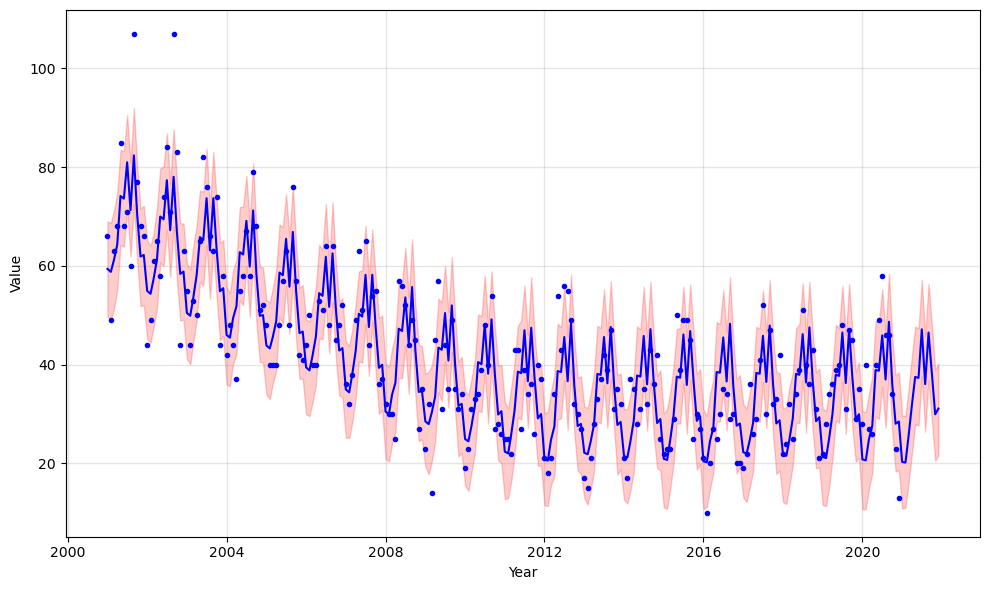

<Figure size 640x480 with 0 Axes>

In [14]:
fig = plot(model, forecast)
for ax in fig.get_axes():
    lines = ax.get_lines()
    for line in lines:
        line.set_color('blue')  

    dots = ax.collections
    for dot in dots:
        dot.set_color('red') 
# Changing axis labels
for ax in fig.get_axes():
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
# Show the updated plot
plt.show()
plt.savefig('Predictions_visualization.png') 

## **Predictictions for 2021,2020**

In [128]:
# Filter predictions for January 2021...should be 16
jan_2021_prediction = forecast[(forecast['ds'].dt.year == 2021) & (forecast['ds'].dt.month == 1)]
print(jan_2021_prediction[['ds', 'yhat']])

            ds       yhat
241 2021-01-31  20.091318


In [129]:
# Filter predictions for 2020-09....should be 46
sep_2020_prediction = forecast[(forecast['ds'].dt.year == 2020) & (forecast['ds'].dt.month == 9)]
print(sep_2020_prediction[['ds', 'yhat']])

            ds       yhat
236 2020-09-01  48.803213


In [134]:
# Filter predictions for 2021-08....should be 46
aug_2021_prediction = forecast[(forecast['ds'].dt.year == 2021) & (forecast['ds'].dt.month == 8)]
print(aug_2021_prediction[['ds', 'yhat']])

            ds      yhat
248 2021-08-31  46.39617


## **compute the error between your prediction values and the actual numbers (ground truth data)**

In [55]:
# Actual value for January 2021
actual_value = 16

# Predicted value for January 2021
predicted_value = jan_2021_prediction['yhat'].values[0]

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error([actual_value], [predicted_value])
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error([actual_value], [predicted_value])
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 4.091317795813087
Mean Squared Error (MSE): 16.738881306336854


## **Lets try NN model for accurate predictions**

In [86]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [87]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')

# Preprocess the data
data_until_2020 = data[data['JAHR'] <= 2020]
time_series_data = data_until_2020[data_until_2020['MONATSZAHL'] == 'Alkoholunfälle']['WERT'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
scaler.fit(time_series_data)
normalized_data = scaler.transform(time_series_data)
#print(normalized_data)

In [88]:
# Prepare data for the neural network
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 10  # Define the number of time steps to consider for forecasting
X_train, y_train = create_sequences(normalized_data, n_steps)

In [89]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer=Adam(learning_rate=1.0e-4), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0.1)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


## **Forecast for January 2021 ..should be 16**

In [108]:
last_sequence = normalized_data[-n_steps:].reshape(1, n_steps, 1)
forecast_january_normalized = model.predict(last_sequence)
forecast_january = scaler.inverse_transform(forecast_january_reshaped)[0][0]
print(f"Predicted number of 'Alkoholunfälle' for January 2021: {forecast_january}")

1/1 [==============================] - 0s 16ms/step
Predicted number of 'Alkoholunfälle' for January 2021: 16.834585189819336


## **forecasted the value of januaray 2020... should be 28**

In [109]:
# Get the data for January 2020
jan_2020_data = normalized_data[-(n_steps+1):-1].reshape(1, n_steps, 1)
# Predict for January 2020 using the model
forecast_january_2020_normalized = model.predict(jan_2020_data)
forecast_january_2020_normalized
forecast_january_2020 = scaler.inverse_transform(forecast_january_2020_reshaped)[0][5]
print(f"Predicted number of 'Alkoholunfälle' for January 2020: {forecast_january_2020}")

1/1 [==============================] - 0s 17ms/step
Predicted number of 'Alkoholunfälle' for January 2020: 27.768295288085938


In [110]:
# Assuming you have already performed predictions and have these values available
forecasted_value_jan_2021 = 16.834585189819336 # Replace this with your predicted value
actual_value_jan_2021 = 16  # Replace this with your actual value

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared
r_squared = r2_score([actual_value_jan_2021], [forecasted_value_jan_2021])

# Calculate MAE
mae = mean_absolute_error([actual_value_jan_2021], [forecasted_value_jan_2021])

# Calculate MSE
mse = mean_squared_error([actual_value_jan_2021], [forecasted_value_jan_2021])

# Calculate RMSE
rmse = mean_squared_error([actual_value_jan_2021], [forecasted_value_jan_2021], squared=False)

print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: nan
Mean Absolute Error (MAE): 0.8345851898193359
Mean Squared Error (MSE): 0.696532439065777
Root Mean Squared Error (RMSE): 0.8345851898193359


/opt/conda/envs/py310-pt111/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
